In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

2022-11-26 14:51:47.547034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 14:51:47.867383: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-26 14:51:47.907114: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 14:51:47.907164: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

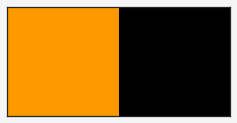

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

In [3]:
df = pd.read_csv('MSFT.csv')
df
df1 = pd.read_csv('MSFT_short_frame.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-27,83.309998,83.980003,83.300003,83.870003,78.981613,18265200
1,2017-11-28,84.070000,85.059998,84.019997,84.879997,79.932755,21926000
2,2017-11-29,84.709999,84.919998,83.180000,83.339996,78.482521,27381100
3,2017-11-30,83.510002,84.519997,83.339996,84.169998,79.264130,33054600
4,2017-12-01,83.599998,84.809998,83.220001,84.260002,79.348885,29532100
...,...,...,...,...,...,...,...
1253,2022-11-17,237.779999,243.250000,237.630005,241.679993,241.679993,23123500
1254,2022-11-18,243.509995,243.740005,239.029999,241.220001,241.220001,27591800
1255,2022-11-21,241.429993,244.669998,241.190002,242.050003,242.050003,26394700
1256,2022-11-22,243.589996,245.309998,240.710007,245.029999,245.029999,19665700


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9252 non-null   object 
 1   Open       9252 non-null   float64
 2   High       9252 non-null   float64
 3   Low        9252 non-null   float64
 4   Close      9252 non-null   float64
 5   Adj Close  9252 non-null   float64
 6   Volume     9252 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 506.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9252.000000,9252.000000,9252.000000,9252.000000,9252.000000,9.252000e+03
mean,45.355218,45.843430,44.852848,45.363760,40.084806,5.820814e+07
std,66.184615,66.863494,65.455769,66.192767,66.296682,3.832511e+07
min,0.088542,0.092014,0.088542,0.090278,0.056465,2.304000e+06
25%,5.013672,5.099610,4.962891,5.008789,3.132802,3.398570e+07
50%,26.977500,27.230000,26.730000,26.990000,19.000315,5.150820e+07
75%,42.062500,42.598750,41.560001,42.014998,31.033074,7.198240e+07
max,344.619995,349.670013,342.200012,343.109985,339.924805,1.031789e+09


In [7]:
np.round(df.median(),2)

/tmp/ipykernel_5725/1214758968.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.median(),2)


Open               26.98
High               27.23
Low                26.73
Close              26.99
Adj Close          19.00
Volume       51508200.00
dtype: float64

In [8]:
print("Minimum date value : {}".format(df['Date'].min()))
print("Maximum date value : {}".format(df['Date'].max()))


Minimum date value : 1986-03-13
Maximum date value : 2022-11-23


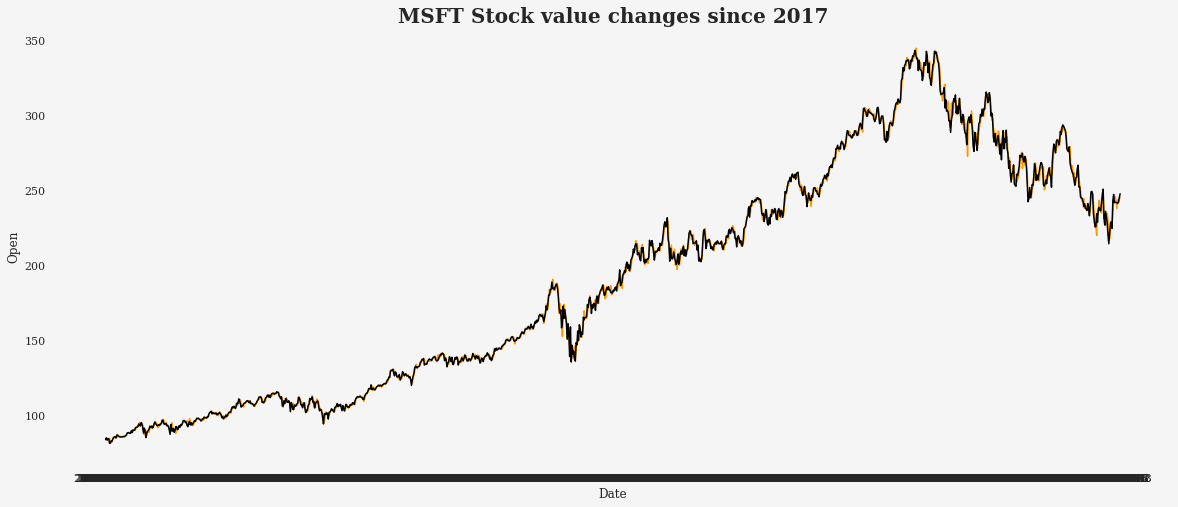

In [9]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='Date',y='Open')
ax=sns.lineplot(data=df1, x='Date',y='Close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("MSFT Stock value changes since 2017", size=20, weight='bold')
plt.show()

Text(0.5, 1.0, 'MSFT Stock volume')

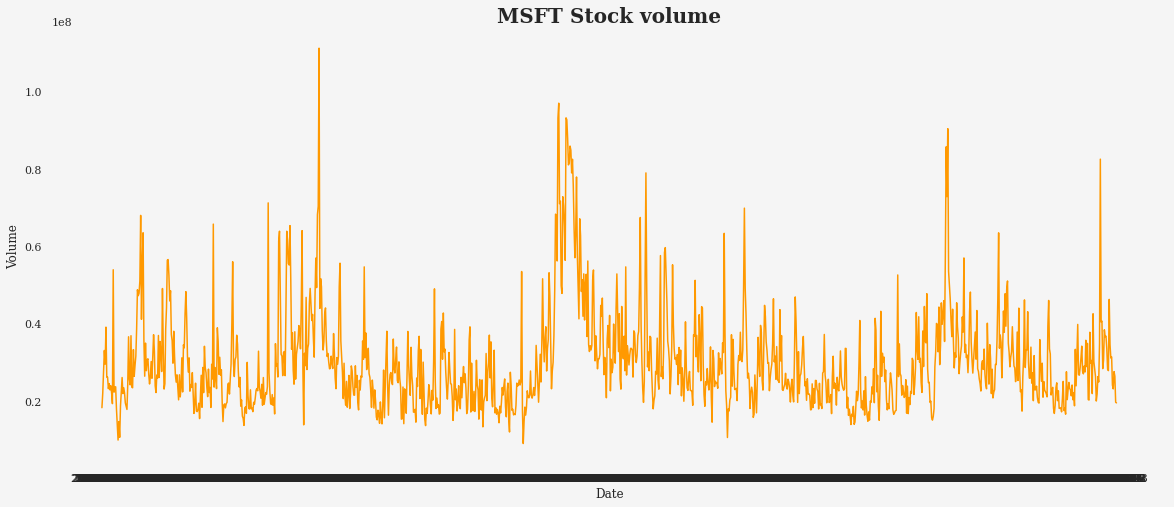

In [31]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='Date',y='Volume')
#ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("MSFT Stock volume", size=20, weight='bold')


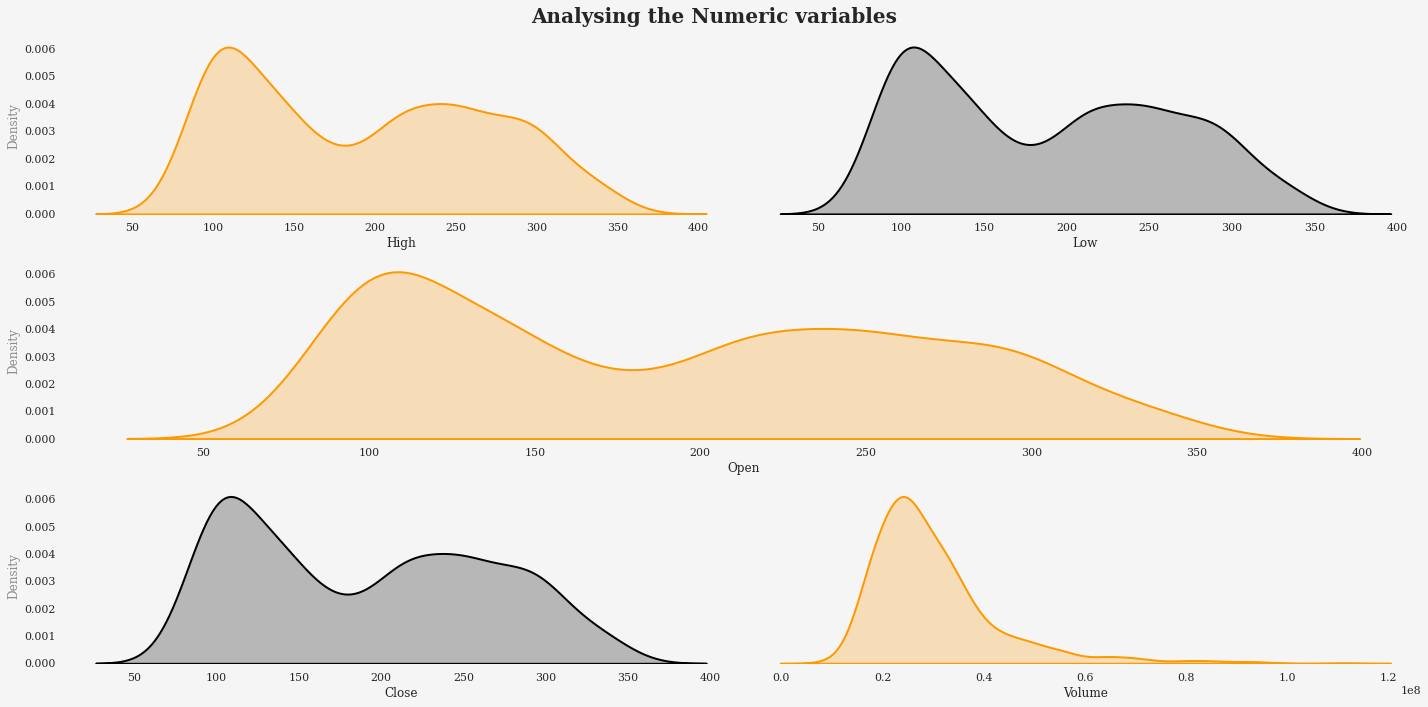

In [11]:
fig=plt.figure(figsize=(20,10), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df1['High'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df1['Low'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['Open'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df1['Close'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['Volume'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

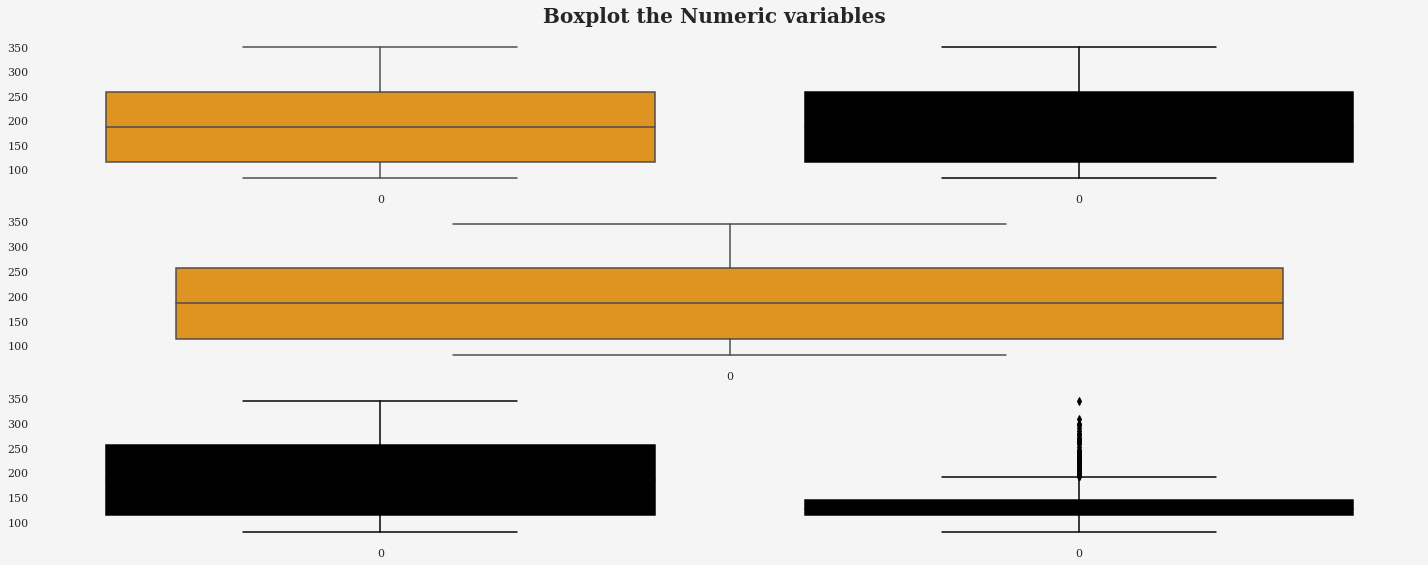

In [12]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df1['High'], ax=ax['A'], color=colors[0])
sns.boxplot(df1['Low'], ax=ax['B'], color=colors[1])
sns.boxplot(df1['Open'], ax=ax['C'], color=colors[0])
sns.boxplot(df1['Close'], ax=ax['D'], color=colors[1])
sns.boxplot(df1['Volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

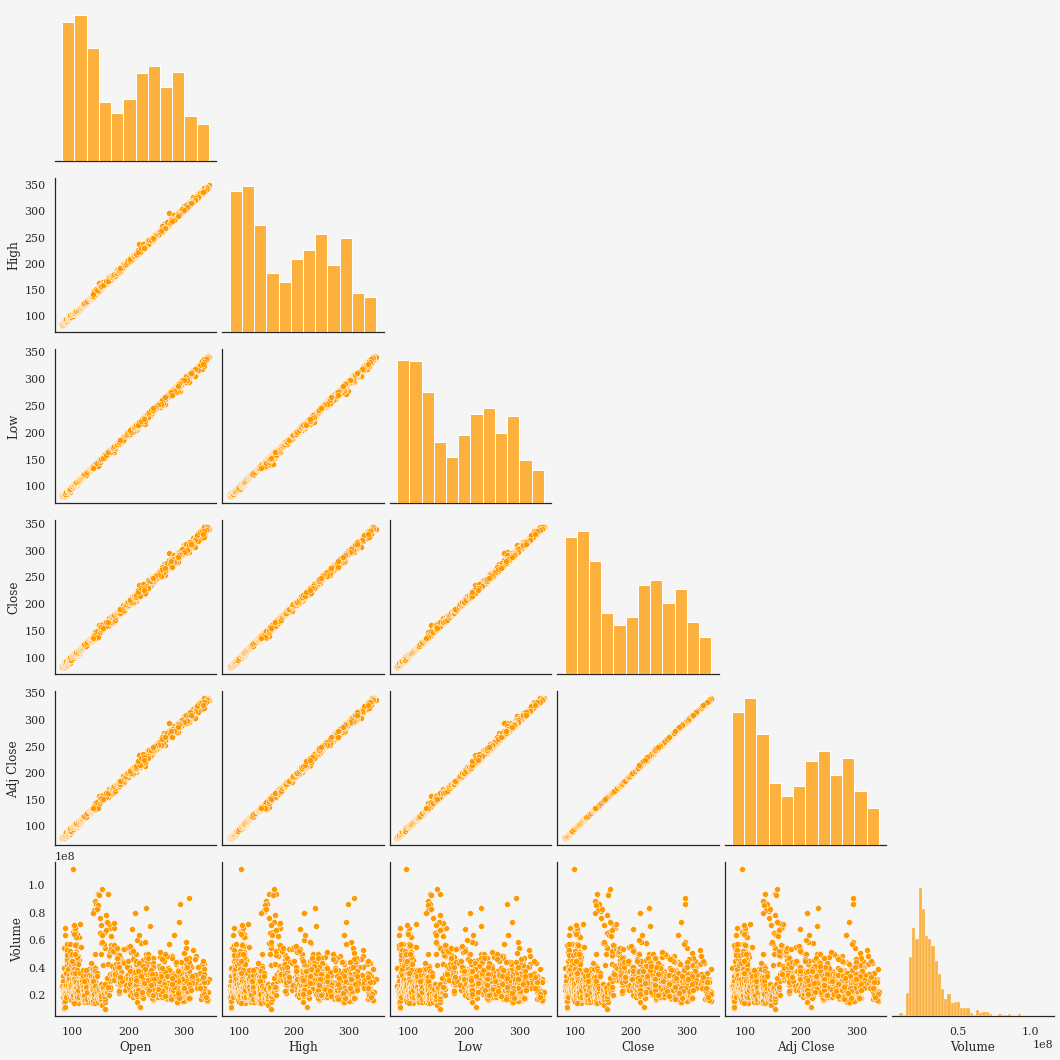

In [13]:
# we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable. 
sns.pairplot(df1,corner=True)

In [14]:
df1.corr()['Close']

/tmp/ipykernel_5725/838006689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['Close']


Open         0.999193
High         0.999579
Low          0.999621
Close        1.000000
Adj Close    0.999932
Volume      -0.051103
Name: Close, dtype: float64

In [15]:
from scipy.stats import levene, shapiro
int_cols=df1.select_dtypes(exclude='object').columns.to_list()

for i in int_cols:
    _, p_value=shapiro(df1[i])
    if p_value<0.05:
        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))
        
    print("Normalitiy test p_value for feature -  {} is {}".format(i,np.round(p_value,3)))

Feature Open is normaly distributed
Normalitiy test p_value for feature -  Open is 0.0
Feature High is normaly distributed
Normalitiy test p_value for feature -  High is 0.0
Feature Low is normaly distributed
Normalitiy test p_value for feature -  Low is 0.0
Feature Close is normaly distributed
Normalitiy test p_value for feature -  Close is 0.0
Feature Adj Close is normaly distributed
Normalitiy test p_value for feature -  Adj Close is 0.0
Feature Volume is normaly distributed
Normalitiy test p_value for feature -  Volume is 0.0


/tmp/ipykernel_5725/2551446255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )


<AxesSubplot: >

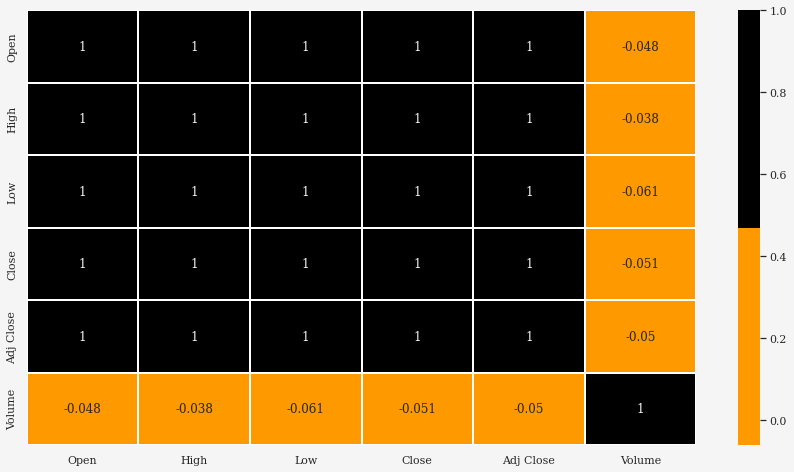

In [16]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

In [17]:
X=df1[['Volume','Open']]
y=df1['Close']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

"plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))\nplt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))\nplt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))\nplt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))"

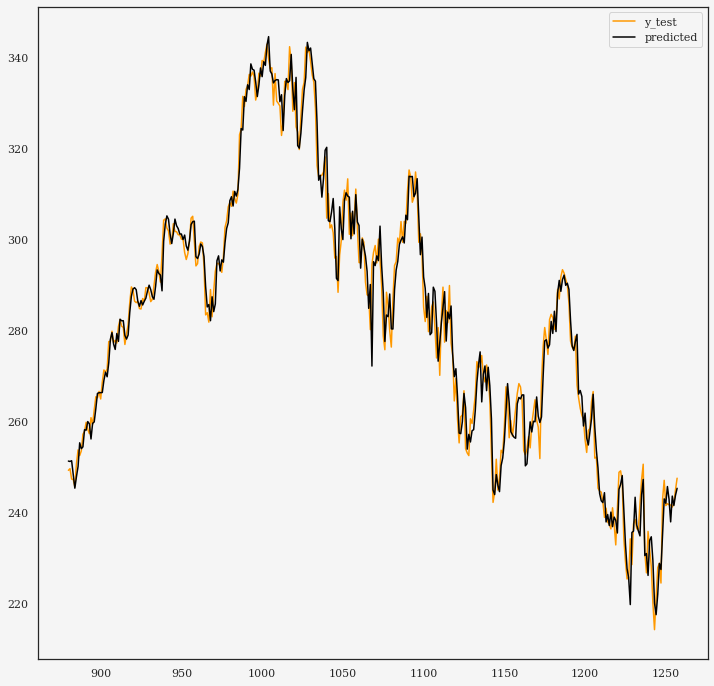

In [21]:
fig=plt.figure(figsize=(12,12))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
#plt.title("Compare test and predicted values", size=10, weight='bold')
'''plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))
plt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))'''

In [22]:
X=df1[['Open','High']]
y=df1['Close']
length=100
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

2022-11-26 14:54:10.614312: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-26 14:54:10.614453: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Paul-Asus-tuf
2022-11-26 14:54:10.614467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Paul-Asus-tuf
2022-11-26 14:54:10.614764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.56.6
2022-11-26 14:54:10.614879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  520.56.06  Release Build  (dvs-builder@U16-T12-10-2)  Thu Oct  6 21:33:54 UTC 2022
GCC version:  gcc version 11.3.0 (Ubuntu 11.3.

Epoch 1/100
29/29 [==============================] - 24s 346ms/step - loss: 0.0354 - val_loss: 0.0054
Epoch 2/100
29/29 [==============================] - 7s 250ms/step - loss: 0.0047 - val_loss: 0.0133
Epoch 3/100
29/29 [==============================] - 7s 251ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 4/100
29/29 [==============================] - 7s 251ms/step - loss: 0.0035 - val_loss: 0.0067
Epoch 5/100
29/29 [==============================] - 7s 255ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 6/100
29/29 [==============================] - 7s 255ms/step - loss: 0.0035 - val_loss: 0.0165
Epoch 7/100
29/29 [==============================] - 7s 257ms/step - loss: 0.0031 - val_loss: 0.0062
Epoch 8/100
29/29 [==============================] - 8s 281ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 9/100
29/29 [==============================] - 8s 284ms/step - loss: 0.0029 - val_loss: 0.0098
Epoch 10/100
29/29 [==============================] - 9s 311ms/step - loss: 0.0031 - val_l

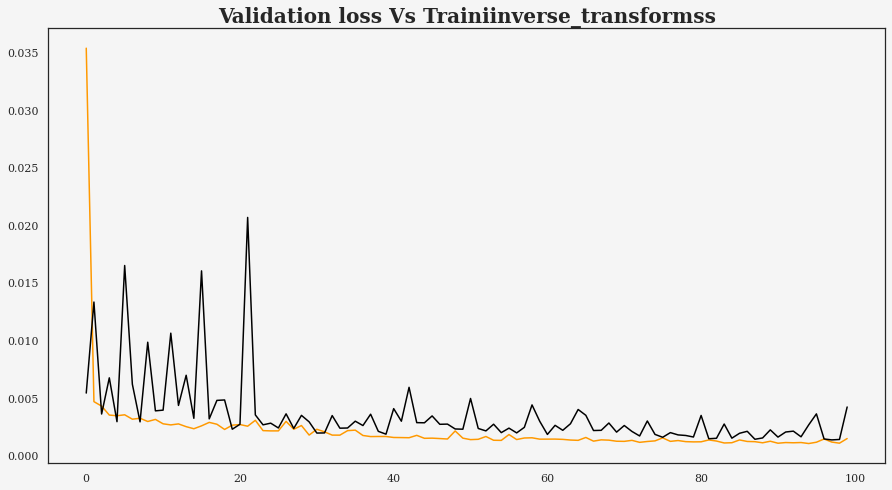

In [24]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Trainiinverse_transformss", size=20, weight='bold')
plt.plot(loss)

In [25]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

5/5 [==============================] - 3s 80ms/step


,test,pred
0,0.818330,0.918723
1,0.808415,0.904462
2,0.783101,0.888424
3,0.803943,0.870875
4,0.768247,0.854934
...,...,...
153,0.608314,0.652597
154,0.630595,0.664102
155,0.622506,0.671593
156,0.630906,0.675428


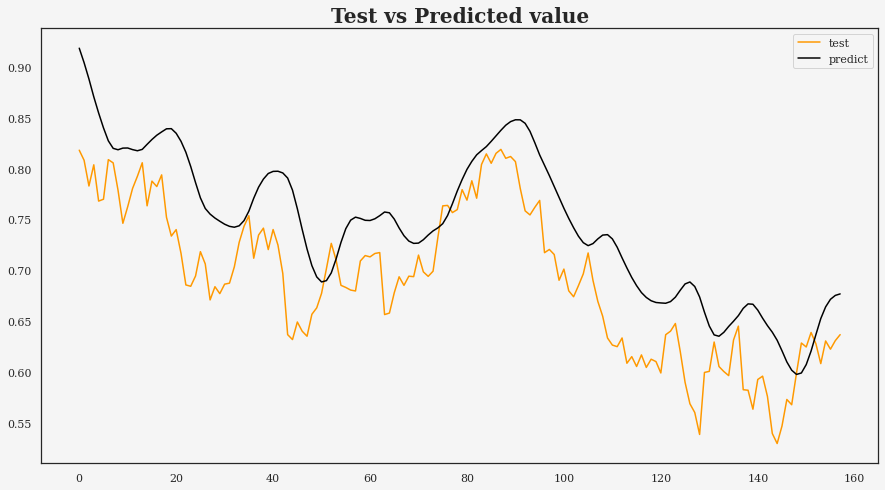

In [26]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
#plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
#plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
#plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))